<a href="https://colab.research.google.com/github/schwarzRabe/Stattistic/blob/main/MK_Stat_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1 (на сопоставление)

1. z-тест - (E) проверка среднего выборки на конкретное значение при известной дисперсии

2. t-тест - (B) проверка среднего выборки на конкретное значение при неизвестной дисперсии

3. F-тест3 - (F) сравнение дисперсий двух выборок

4. χ2-тест - (D) проверка дисперсии выборки на конкретное значение при известном среднем, (G) наличие или отсутствие связи между параметрами, (C) соответствие структуры данных гипотетической модели

5. ANOVA - (A) анализ различий между многими выборками


Задание 2 (про порошок)

Порошок для посудомоечной машины насыпается в коробки, в которых он продается, с помощью
автоматического дозатора, который настроен на дозирование 3 кг порошка в каждую коробку. Чтобы
проверить, что дозатор работает в соответствии с приемлемым стандартом (т. е. не нуждается в настройке),
инженер-технолог берет случайные образцы из 50 коробок и взвешивает их. Установлено, что средний вес
образца составляет 3,005 кг. Известно, что дозатор работает с отклонением 0,015 кг и что производитель
порошка готов полагаться на 5% уровень значимости. Предоставляет ли образец инженеру достаточные
доказательства того, что истинное среднее значение не равно 3,00 кг, и поэтому машина требует
настройки?

In [27]:
import scipy.stats as stats
import numpy as np
import math

In [ ]:
'''Ваш ответ на задание №2
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [11]:
# Известно стандартное отклонение генеральной совокупности, большой размер выборки n = 50
# используем двухсторонний z-тест
#Нулевая гипотеза (H0): среднее количество порошка в коробке = 3 кг (по генеральной выборке)
#Альтернативная гипотеза (H1): среднее количество порошка в коробке != 3 кг. (по генеральной выборке)

n = 50                      # Объем выборки
х_mean = 3.005              # Выборочное среднее
mu = 3.0                    # Гипотетическое значение среднего (нулевая гипотеза)
std_dev = 0.015             # Стандартное отклонение генеральной совокупности
alpha = 0.05                # Уровень значимости


z_stat = (х_mean - mu) / (std_dev / math.sqrt(n))  # Расчет Z-статистики
z_critical = stats.norm.ppf(1 - alpha / 2)     # критическое значение (интервал значимости для двухстороннего теста)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))    # p-value

# Вывод результатов
print(f"Z-статистика: {round(z_stat,3)}")
print(f"Критическое значение: ±{round(z_critical,3)}")
print(f"p-значение: {round(p_value,3)}")
# принятие решения на основе критического значения z
if abs(z_stat) > z_critical:
    print("z-тест: Отклонить нулевую гипотезу.")
else:
    print("z-тест: Не отвергаем нулевую гипотезу. ")

# принятие решения на основе p-value
if p_value < alpha: # сравниваем p-value с уровнем значимости
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")


Z-статистика: 2.357
Критическое значение: ±1.96
p-значение: 0.018
z-тест: Отклонить нулевую гипотезу.
p_value: Отклонить нулевую гипотезу.


Статистический вывод: на имеющихся данных для уровня доверия 95% есть основания отвергнуть нулевую гипотезу.
Содержательный вывод: среднее значение веса порошка в коробках не равно 3,00 кг., машина требует настройки.

Задание 3 (про двигатели)

Производитель двигателей хочет заменить стальные компоненты подвески алюминиевыми, чтобы снизить
вес и тем самым улучшить производительность и расход топлива. Испытания на прочность проводятся на
случайно выбранных образцах из двух возможных веществ, прежде чем будет сделан окончательный
выбор.
Есть ли разница между средними прочностными характеристиками веществ на уровне значимости 5%?
Результаты испытаний таковы:

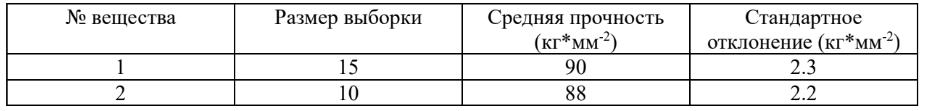

In [ ]:
'''Ваш ответ на задание №3
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [31]:
#Стандартное отклонение генеральной совокупности нам неизвестно, значения выборок небольшие.
#используем двухсторонний t-тест
#Нулевая гипотеза (H0): Средние прочностные характеристики стали и алюминия равны, mu1 = mu2
#Альтернативная гипотеза (H1): Средние прочностные характеристики алюминия и стали неравны mu1 != mu2

import scipy.stats as stats
import numpy as np
import math

n1 = 15
x1_mean = 90
std1 = 2.3

n2 = 10
x2_mean = 88
std2 = 2.2

alpha = 0.05
# t-тест для средних значений двух независимых выборок
t_stat, p_value = stats.ttest_ind_from_stats(mean1=x1_mean, std1=std1, nobs1=n1, mean2=x2_mean, std2=std2, nobs2=n2)

df = n1 + n2 - 2   # Степени свободы для 2-х выборок
critical_value = stats.t.ppf(1 - alpha/2, df)
print(f"Критическое значение t: ±{critical_value}")
print(f"t-статистика: {round(t_stat, 4)}")
print(f"p-значение: {round(p_value, 4)}")

if abs(t_stat) > critical_value:
    print("t-тест: Отклонить нулевую гипотезу.")
else:
    print("t-тест: Не отвергаем нулевую гипотезу. ")

if p_value < alpha:
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")


Критическое значение t: ±2.0686576104190406
t-статистика: 2.1664
p-значение: 0.0409
t-тест: Отклонить нулевую гипотезу.
p_value: Отклонить нулевую гипотезу.


Статистический вывод: на имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу. Содержательный вывод: прочностные характеристики двух материалов, стали и алюминия, различаются. Замена стальных компонентов на алюминевые может повлиять на прочность двигателей.

Задание 4 (про токи)

Производитель электронного оборудования разработал схему для подачи тока на определенный компонент
экрана дисплея компьютера. Хотя новая конструкция дешевле в производстве, ее можно внедрить в
массовое производство только в том случае, если она пропускает к компоненту тот же средний ток. В ходе
испытаний с участием двух схем получены следующие результаты.

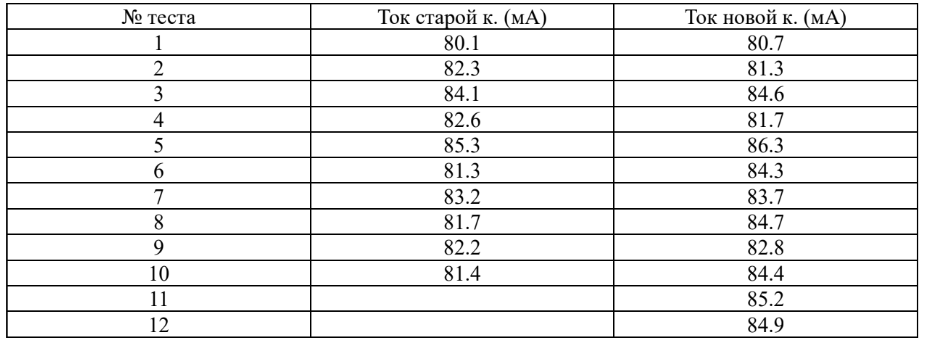

Если предположить, что выборки, из которых взяты результаты, имеют равные дисперсии, следует ли
производителю заменить старую конструкцию схемы на новую? Используйте уровень значимости 5%.

In [ ]:
'''Ваш ответ на задание №4
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [32]:
#Значение стандартного отклонения генеральной совокупности нам неизвестно,значения выборок небольшие,
#двухсторонний t-тест для двух независимых выборок
#Нулевая гипотеза (H0): Конструкции пропускают одинаковый средний ток.
#Альтернативная гипотеза (H1): Средние токи двух конструкций отличаются.
import numpy as np
import scipy.stats as stats

test1 = np.array([80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4])
test2 = np.array([80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4, 85.2, 84.9])

alpha = 0.05

t_stat, p_value = stats.ttest_ind(test1, test2)
df = len(test1) + len(test2) - 2    # Степени свободы
critical_value = stats.t.ppf(1 - alpha / 2, df)

print(f"Критическое значение t: ±{critical_value}")
print(f"t-статистика: {round(t_stat, 4)}")
print(f"p-значение: {round(p_value, 4)}")

if abs(t_stat) > critical_value:
    print("t-тест: Отклонить нулевую гипотезу.")
else:
    print("t-тест: Не отвергаем нулевую гипотезу. ")

if p_value < alpha:
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")

Критическое значение t: ±2.0859634472658364
t-статистика: -1.8657
p-значение: 0.0768
t-тест: Не отвергаем нулевую гипотезу. 
p_value: Не отвергаем нулевую гипотезу.


Статистический вывод: не отвергаем нулевую гипотезу: статистически значимых различий между токами нет.

Содержательный вывод: нет достаточных оснований утверждать, что средние токи новой и старой конструкций различны. Производитель может заменить старую конструкцию схемы на новую.

Задание 5 (про глюкозу)

Для оценки эффективности нового гипогликемического средства были проведены измерения уровня
глюкозы в крови пациентов, страдающих сахарным диабетом, до и после приема препарата. В результате
были получены следующие данные:

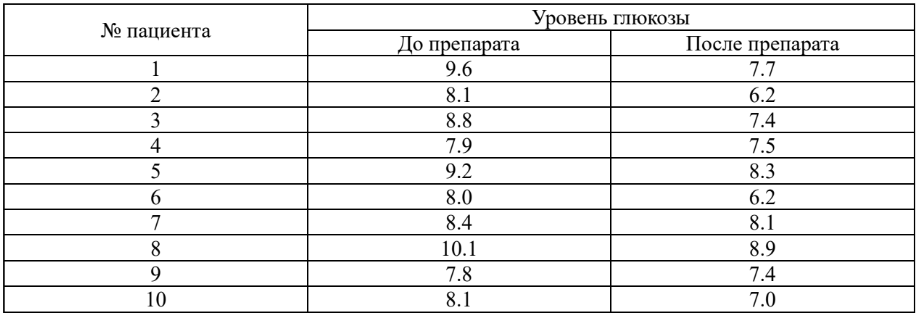

Определите, есть ли эффект от приема препарата на уровне доверия 0.95.

In [ ]:
'''Ваш ответ на задание №5
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [33]:
#значение стандартного отклонения генеральной совокупности неизвестно,значения выборок небольшие,
#применяем односторонний (т.к нас интересует снижение сахара) парный t-тест(в выборках участвуют одни и те же пациенты)

#Нулевая гипотеза (H0): Среднее значение уровня глюкозы с препаратом и без равны (mu1 = mu2).
#Альтернативная гипотеза (H1): Среднее значение уровня глюкозы с препаратом меньше, чем без препарата (mu1 < mu2).

import numpy as np
import scipy.stats as stats

test1 = np.array([9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1])
test2 = np.array([7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0])

alpha = 0.05

t_stat, p_value = stats.ttest_rel(test1, test2)
critical_value = stats.t.ppf(1 - alpha, test1.size + test2.size - 2)
p_value = p_value/2
print(f"Критическое значение t: ±{critical_value}")
print(f"t-статистика: {round(t_stat, 4)}")
print(f"p-значение: {round(p_value, 4)}")

if abs(t_stat) > critical_value:
    print("t-тест: Отклонить нулевую гипотезу.")
else:
    print("t-тест: Не отвергаем нулевую гипотезу. ")

if p_value < alpha:
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")

Критическое значение t: ±1.7340636066175354
t-статистика: 5.713
p-значение: 0.0001
t-тест: Отклонить нулевую гипотезу.
p_value: Отклонить нулевую гипотезу.


Статистический вывод: Для уровня доверия 95%  можем утверждать, что есть основания отвегнуть нулевую гипотезу в пользу альтернативы.

Содержательный вывод: Различия между средними уровнями до и после приема препарата глюкозы статистически значимы и применение данного препарата может быть оправдано.

Задание 6 (про тросы)

Производитель стальных тросов, используемых при строительстве подвесных мостов, экспериментировал
с новым типом стали, который, как он надеется, сделает производимые тросы более прочными в том
смысле, что они будут выдерживать большие нагрузки натяжения до разрушения. Для того чтобы
проверить производительность новых тросов по сравнению со старыми тросами, образцы испытываются
на разрушение при растяжении. Полученные результаты приведены ниже, где напряжения разрушения
указаны в кг×103

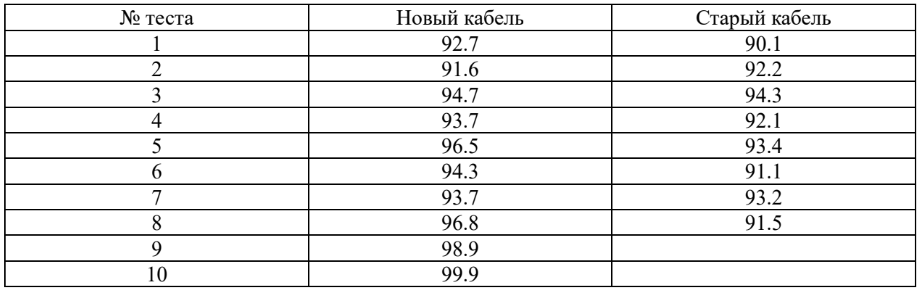

Изготовитель кабеля, изучив законодательство по охране труда и технике безопасности, решает, что в
любой статистической процедуре тестирования, принятой для различения кабелей, следует использовать
уровень значимости 1%. На основе полученных результатов и предполагая, что выборки, из которых взяты
образцы, не имеют равных дисперсий, должен ли изготовитель заменить старый кабель новым?


In [ ]:
'''Ваш ответ на задание №6
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [34]:
#значение стандартного отклонения генеральной совокупности неизвестно, значения выборок небольшие
#применяем односторонний t-тест для независимых выборок

#Нулевая гипотеза (H0): Среднее значение прочностей двух типов стали одинаковое (mu1 = mu2).
#Альтернативная гипотеза (H1): Среднее значение прочностей новой стали больше, чем старой (mu1 > mu2).

import numpy as np
import scipy.stats as stats

test1 = np.array([92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9])
test2 = np.array([90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5])

alpha = 0.01

t_stat, p_value = stats.ttest_ind(test1, test2, equal_var=False)
# equal_var=False - выполнием t-тест Уэлча, который не предполагает равные дисперсии.
p_value = p_value/2
critical_value = stats.t.ppf(1 - alpha, test1.size + test2.size - 2)

print(f"Критическое значение t: ±{critical_value}")
print(f"t-статистика: {round(t_stat, 4)}")
print(f"p-значение: {round(p_value, 4)}")
if abs(t_stat) > critical_value:
    print("t-тест: Отклонить нулевую гипотезу.")
else:
    print("t-тест: Не отвергаем нулевую гипотезу. ")

if p_value < alpha:
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")

Критическое значение t: ±2.583487185267472
t-статистика: 3.1204
p-значение: 0.0038
t-тест: Отклонить нулевую гипотезу.
p_value: Отклонить нулевую гипотезу.


Статистический вывод: на имеющихся данных, на уровне значимости 1% есть основания отвергнуьт нулевую гипотезу в пользу адльтернативы

Содержательный вывод: Новые тросы прочнее старых.Производитель может заменить старый трос новым.

Задание 7 (про абитуриентов)

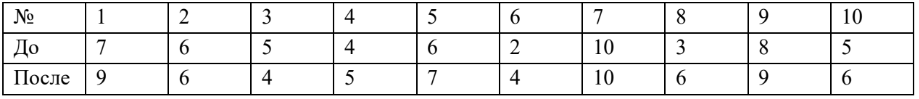

10 абитуриентов пришли на подготовительные курсы по ЕГЭ и написали тестирование в начале обучения
и после. Результаты теста приведены в таблице. Влияют ли подготовительные курсы на подготовку абитуриентов на уровне значимости 0.01?

In [ ]:
'''Ваш ответ на задание №7
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [24]:
#значение стандартного отклонения генеральной совокупности неизвестно,значения выборок небольшие,
#применяем односторонний парный t-тест (в выборках участвуют одни и те же абитурьенты; ищем положительное влияние подготовки)

#Нулевая гипотеза (H0): Среднее значение результата тестов с подготовкой на курсах и без равны (mu1 = mu).
#Альтернативная гипотеза (H1): Среднее значение результата тестов с подготовкой большей, чем без (mu1 > mu2).

import numpy as np
import scipy.stats as stats

test1 = np.array([7, 6, 5, 4, 6, 2, 10, 3, 8, 5])
test2 = np.array([9, 6, 4, 5, 7, 4, 10, 6, 10, 6])

alpha = 0.01

t_stat, p_value = stats.ttest_rel(test1, test2)
p_value = p_value/2
critical_value = stats.t.ppf(1 - alpha, test1.size + test2.size - 2)

print(f"Критическое значение t: ±{critical_value}")
print(f"t-статистика: {round(t_stat, 4)}")
print(f"p-значение: {round(p_value, 4)}")

if abs(t_stat) > critical_value:
    print("t-тест: Отклонить нулевую гипотезу.")
else:
    print("t-тест: Не отвергаем нулевую гипотезу. ")

if p_value < alpha:
    print("p_value: Отклонить нулевую гипотезу.")
else:
    print("p_value: Не отвергаем нулевую гипотезу.")

Критическое значение t: ±2.552379630179453
t-статистика: -2.9055
p-значение: 0.0087
t-тест: Отклонить нулевую гипотезу.
p_value: Отклонить нулевую гипотезу.


Статистический вывод: на имеющихся данных, на уровне значимости 1% есть основания отвергнуьт нулевую гипотезу в пользу альтернативы.

Содержательный вывод: Студенты показали лучшие результаты после подготовки. Подготовительные курсы являются эффективными.

Задание 8 (про фрукты и IQ)

Были проведены исследования влияния фруктов на IQ людей. Первая группа среди всех фруктов питалась
исключительно апельсинами, вторая – только грушами.

Проверьте гипотезу, что дисперсии обеих групп одинаковые на уровне значимости 0.05.

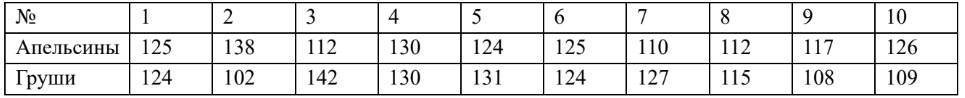

In [ ]:
'''Ваш ответ на задание №8
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [26]:
#имеем два идентичных средних значения в 2-х различных выборках, используем F-тест
#Нулевая гипотеза (H0): Дисперсии обеих групп равны
#Альтернативная гипотеза (H1): Дисперсии обеих групп различаются

import numpy as np
import scipy.stats as stats

orange = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
birne = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])

alpha = 0.05
n = len(orange)
S1 = orange.var()*n/(n-1)
S2 = birne.var()*n/(n-1)
F_score = S2/S1
F_critical = stats.f.ppf(1 - alpha, dfn = n-1, dfd = n-1)
p_value = 1 - stats.f.cdf(np.abs(F_score), dfn = n-1, dfd = n-1)

print('Critical F-Score:', F_critical)
print('F-score:', np.abs(F_score))
print('P-Value :', p_value)

if np.abs(F_score) > F_critical:
    print("На основе F-critical отклоняем нулевую гипотезу")
else:
    print("На основе F-critical нельзя отклонить нулевую гипотезу")
p_value = 1 - stats.f.cdf(np.abs(F_score), dfn = n-1, dfd = n-1)

if p_value < alpha:
    print("На основе p-value отклоняем нулевую гипотезу")
else:
    print("На основе p-value нельзя отклонить нулевую гипотезу")

Critical F-Score: 3.178893104458269
F-score: 1.9061769156692805
P-Value : 0.17529362058224196
На основе F-critical нельзя отклонить нулевую гипотезу
На основе p-value нельзя отклонить нулевую гипотезу


Статистический вывод: на уровне значимости 5% мы принимаем нулевую гипотезу, дисперсии выборок незначительно отличаются друг от друга.

Содержательный вывод: Употребление исключительно одних фруктов не влияет на разброс значений IQ

Задание 9 (про самолеты)

Для 100 самолетов была составлена таблица, показывающая, сколько потребовалось вылетов каждому
самолету, чтобы найти потерявшийся в море корабль. Предложите распределение, которое могло бы соответствовать этим данным на уровне доверия 0.95.

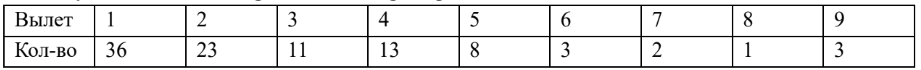

In [ ]:
'''Ваш ответ на задание №9
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Оценка λ: 2.74
Статистика хи-квадрат: 72.50619032809553
Критическое значение хи-квадрат: 9.487729036781154
P-значение: 1.5551461913805467e-12
На основании сравнения хи-квадрат критического с расчетным отвергаем нулевую гипотезу
На основании сравнения p-value и уровня значимости отвергаем нулевую гипотезу: данные не соответствуют распределению Пуассона


Text(0, 0.5, 'Частота')

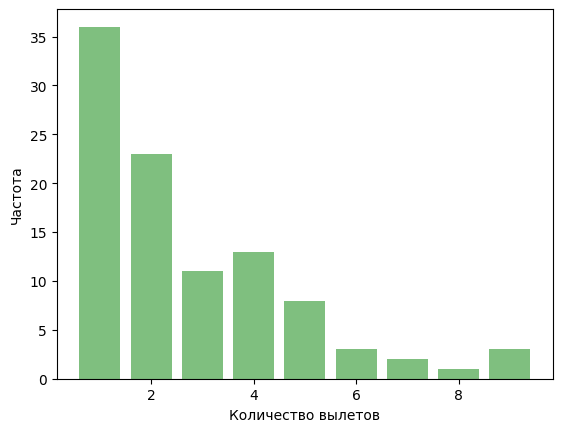

In [68]:
#Нулевая гипотеза (H0):        Распределение соответсвует распределению Пуассона
#Альтернативная гипотеза (H1): Распределение не соответсвует распределению Пуассона

#используем тест Хи-квадрат для проверки соответствия данных гипотетической модели.

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

flugzeug = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # Число вылетов
counts = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])  # Частоты
alpha = 0.05

n = counts.sum()  # Объем выборки
lambda_ = np.sum(flugzeug * counts) / n  # Оценка параметра λ для распределения Пуассона (среднее)
total_ = np.sum(counts)
theor_frequency = np.array([stats.poisson.pmf(k, lambda_) * total_ for k in flugzeug])

theor_frequency *= total_ / np.sum(theor_frequency) # нормализация

# Вычисление статистики χ²
chi2_stat, p_value = stats.chisquare(counts, f_exp=theor_frequency)
# Число степеней свободы c учетом λ
df = len(observed) - 2

# Критическое значение χ²
chi2_critical = stats.chi2.ppf((1-alpha), df)

print(f"Оценка λ: {lambda_}")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"Критическое значение хи-квадрат: {chi2_critical}")
print(f"P-значение: {p_value}")
if chi2_stat > chi2_critical:
    print("На основании сравнения хи-квадрат критического с расчетным отвергаем нулевую гипотезу")
else:
    print("На основании сравнения хи-квадрат критического с расчетным не отвергаем нулевую гипотезу")

if p_value < alpha:
    print("На основании сравнения p-value и уровня значимости отвергаем нулевую гипотезу: данные не соответствуют распределению Пуассона")
else:
    print("На основании сравнения p-value и уровня значимости не отвергаем нулевую гипотезу: данные могут соответствовать распределению Пуассона")

plt.bar(flugzeug, counts, alpha=0.5, color='green')
plt.xlabel('Количество вылетов')
plt.ylabel('Частота')


In [71]:
#Нулевая гипотеза (H0):        Геометрическое распределение
#Альтернативная гипотеза (H1): Распределение не соответсвует геометрическому
#Вероятность обнаружить корабль при каждом вылете одинакова и можем предположить геометрическое распределение
#- вероятность того, что произойдет успешное событие к после n неудач
flugzeug = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])
alpha = 0.05
N = 100

# Расчет
mean_flights = np.sum(flugzeug * np.arange(1, len(flugzeug) + 1)) / N  # Среднеее количество вылетов
p = 1 / mean_flights                                               # Вероятность успеха каждого вылета
exp = N * (p * (1 - p) ** np.arange(len(flugzeug)))                  # Ожидаемые значения
chi_2 = np.sum((flugzeug - exp) ** 2 / exp) # хи-квадрат
df = len(flugzeug) - 1
chi2_critical = stats.chi2.ppf(1 - alpha, df)   # критический хи2
p_value = 1 - stats.chi2.cdf(chi_2_stat, df) # p-value

# Выводы
print(f"Наблюдаемое хи2: {chi_2_stat:.4f}")
print(f"Критическое хи2: {chi2_critical:.4f}")
print(f"p-value: {p_value:.4f}")
if chi_2_stat > chi2_critical:
    print("Отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.")
else:
    print("Нельзя отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.")
if p_value < alpha:
    print("На основании сравнения p-value и уровня значимости отвергаем нулевую гипотезу")
else:
    print("На основании сравнения p-value и уровня значимости не отвергаем нулевую гипотезу")

Наблюдаемое хи2: 7.7825
Критическое хи2: 15.5073
p-value: 0.4550
Нельзя отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.
На основании сравнения p-value и уровня значимости не отвергаем нулевую гипотезу


Статистический вывод: на уровне значимости 5% мы принимаем нулевую гипотезу.

Содержательный вывод: Данные о количестве вылетов, необходимых для поиска судна, соответствуют геометрическому распределению

Задание 10 (про цвет глаз и волос)

10.В ходе исследования изучается взаимосвязь между цветом глаз (голубые, карие, зелёные) и цветом волос
(светлые, тёмные, рыжие). Существует ли связь между цветом волос и цветом глаз? Определите на уровне доверия 0.95
Собираются следующие данные:

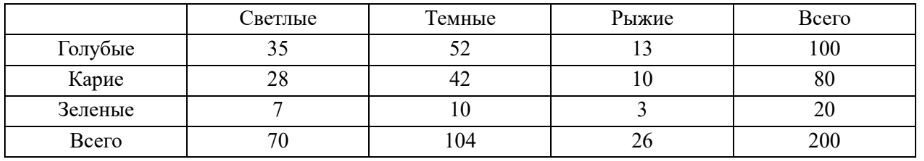

In [ ]:
'''Ваш ответ на задание №10
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [76]:
#анализ взаимосвязи между двумя категориальными переменными, можем использовать тест Хи-квадрат
#Нулевая гипотеза (H0):        Нет никакой связи между цветом глаз и волос
#Альтернативная гипотеза (H1): Связь между цветом волос и глаз имеется
import numpy as np
import scipy.stats as stats
import pandas as pd

data = np.array([[35, 52, 13],
                 [28, 42, 10],
                 [7, 10, 3]])
alpha = 0.05

chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)
critical_value = stats.chi2.ppf(1 - alpha, dof)

print(f"Критическое значение хи-квадрат: {critical_value}")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-значение: {round(p_value, 4)}")

if chi_2_stat > chi2_critical:
    print("Отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.")
else:
    print("Нельзя отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.")
if p_value < alpha:
    print("На основании сравнения p-value и уровня значимости отвергаем нулевую гипотезу")
else:
    print("На основании сравнения p-value и уровня значимости не отвергаем нулевую гипотезу")

Критическое значение хи-квадрат: 9.487729036781154
Статистика хи-квадрат: 0.09615384615384615
P-значение: 0.9989
Нельзя отклонить нулевую гипотезу на основании сравнения хи-квадрат критического с расчетным.
На основании сравнения p-value и уровня значимости не отвергаем нулевую гипотезу


Статистический вывод: на уровне значимости 5% мы отклонить нулевую гипотезу.

Содержательный вывод: на уровне доверия 95% нет взаимосвязи цвета граз и волос

Задание 11 (про тигров)

Международная ассоциация защиты животных собрала данные с разных зоопарков о типах корма тигров
и их массе:

Оцените влияние типа корма на среднюю массу тигров с уровнем значимости 0.05. В случае, если есть
основания отвергнуть нулевую гипотезу о равенстве средних по выборкам, примените тест Тьюки для
подробного определения того, в каких парах групп наблюдается существенное отличие в средних.

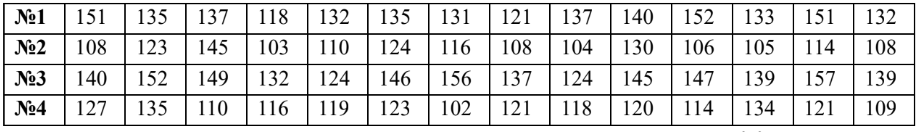

In [ ]:
'''Ваш ответ на задание №11
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- в случае, если нулевая гипотеза отвергнута, сделан тест Тьюки для подробного сравнения средних
- сделано дополнение к статистическому выводу по результатам теста Тьюки
- сделан содержательный вывод по поставленной проблеме'''

Отвергаем нулевую гипотезу: существует связь между типом кормом и массой тигра
используем метод множественного сравнения - критерий Тьюки
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     21.500     0.000    10.981    32.019
 (0 - 2)     -5.857     0.458   -16.376     4.662
 (0 - 3)     16.857     0.000     6.338    27.376
 (1 - 0)    -21.500     0.000   -32.019   -10.981
 (1 - 2)    -27.357     0.000   -37.876   -16.838
 (1 - 3)     -4.643     0.647   -15.162     5.876
 (2 - 0)      5.857     0.458    -4.662    16.376
 (2 - 1)     27.357     0.000    16.838    37.876
 (2 - 3)     22.714     0.000    12.195    33.233
 (3 - 0)    -16.857     0.000   -27.376    -6.338
 (3 - 1)      4.643     0.647    -5.876    15.162
 (3 - 2)    -22.714     0.000   -33.233   -12.195



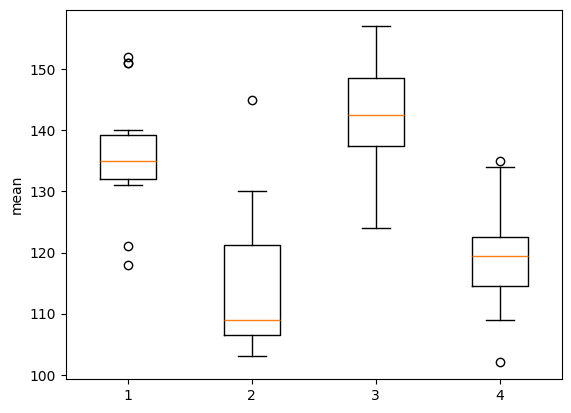

In [26]:
# однофакторный ANOVA, т.к. у нас независимые выборки и ищем различия по одной независимой переменной
# Нулевая гипотеза (H0): Нет никакой связи между кормом и массой тигра, т.е. нет различий средней массы тигров при использовании разного корма
# Альтернативная гипотеза (H1): Связь между кормом и массой тигра имеется
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

zoo1 = np.array([151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132])
zoo2 = np.array([108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108])
zoo3 = np.array([140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139])
zoo4 = np.array([127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109])
alpha = 0.05

res = stats.f_oneway(zoo1, zoo2, zoo3, zoo4)
if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: существует связь между типом кормом и массой тигра")
    print('используем метод множественного сравнения - критерий Тьюки')
#  преобразуем данные в одну таблицу
    data = {'value': np.concatenate([zoo1, zoo2, zoo3, zoo4]),
            'group': ['zradlo1'] * len(zoo1) + ['zradlo2'] * len(zoo2) + ['zradlo3'] * len(zoo3) + ['zradlo4'] * len(zoo4) }
    df = pd.DataFrame(data)

    res = stats.tukey_hsd(zoo1, zoo2, zoo3, zoo4)
    print(res)

    fig, ax = plt.subplots(1, 1)
    ax.boxplot([zoo1, zoo2, zoo3, zoo4])
    ax.set_xticklabels(['1', '2', '3', '4'])
    ax.set_ylabel("mean")
    plt.show()
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой связи между типом кормом и массой тигра")


Попарно результаты:

корма 1 и 2 — нулевая гипотеза отвергается

корма 1 и 3, p-value = 0,458, нулевая гипотеза не отвергается

корма 1 и 4 — нулевая гипотеза отвергается

корма 2 и 3 — нулевая гипотеза отвергается

корма 2 и 4, p-value = 0,647, нулевая гипотеза не отвергается

корма 3 и 4 — нулевая гипотеза отвергается

Обнаружено влияние корма на среднюю массу тигра с уровнем значимости 0,05


Задание 12 (про белок)

Изучается влияние размножения на массу тела у самок африканских земляных белок разного возраста.
Определите наличие влияния факторов на целевое значение на уровне доверия 0,95, используя
последовательные суммы квадратов.
Результаты занесены в таблицу:


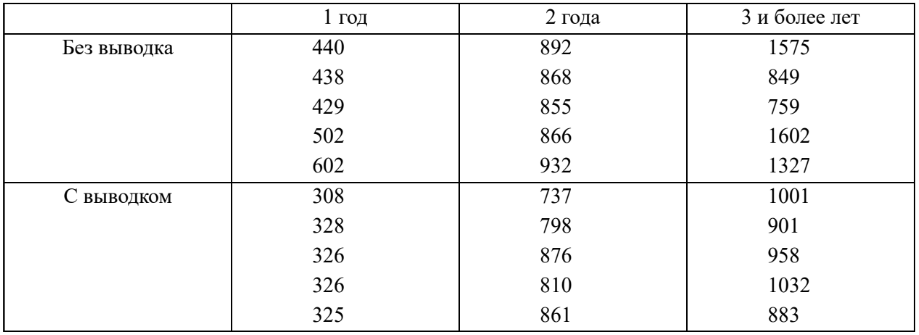

In [ ]:
'''Ваш ответ на задание №12
- верно указана применяемая статистика и обоснование ее применения
- расчет выполнен через последовательные суммы квадратов
- получены расчетные значения статистики
- получены значения p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

In [21]:
# двухфакторный ANOVA, т.к. у нас независимые выборки и ищем различия по двум переменным (возраст, размножение)
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#Нулевая гипотеза (H0): Нет никакой связи между массой, возрастом и наличия выводка
#Альтернативная гипотеза (H1): Хотя бы в одной из паре признаков связь присутствует
data = {
    'Возраст': ['1 год'] * 10 + ['2 года'] * 10 + ['3 и более лет'] * 10,
    'Размножение': ['Без выводка'] * 5 + ['С выводком'] * 5 +
                 ['Без выводка'] * 5 + ['С выводком'] * 5 +
                 ['Без выводка'] * 5 + ['С выводком'] * 5,
    'Масса': [440, 438, 429, 502, 602, 308, 328, 326, 326, 325,
              892, 868, 855, 866, 932, 737, 798, 876, 810, 861,
              1575, 849, 759, 1602, 1327, 1001, 901, 958, 1032, 883]
}

df = pd.DataFrame(data)
alpha = 0.05

A_model = ols('Масса ~ C(Возраст) + C(Размножение) + C(Возраст):C(Размножение)', data=df).fit()
anova_res = anova_lm(A_model, typ=1)

display(anova_res)


,df,sum_sq,mean_sq,F,PR(>F)
C(Возраст),2.0,2427075.8,1.213538e+06,42.377707,1.333903e-08
C(Размножение),1.0,202705.2,2.027052e+05,7.078626,1.368668e-02
C(Возраст):C(Размножение),2.0,50688.2,2.534410e+04,0.885036,4.257428e-01
Residual,24.0,687269.6,2.863623e+04,NaN,NaN


Эффект возраста: p-значение (PR(>F) = 1.33e-08) значительно меньше alpha=0.05, что эффект возраста статистически значим.

Эффект выводка (C(Выводок)): p-значение (PR(>F) = 0.0137) меньше alpha=0.05, эффект выводка статистически значим.

Взаимодействие (Возраст):(Выводок): p-значение (PR(>F) = 0.4257) значительно больше 0.05, статистически значимое взаимодействие между возрастом и выводком не обнаружено.
